In [12]:
import pandas as pd

In [13]:
df = pd.read_excel("Dataset/emp.xlsx")

In [14]:
df

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,NaN
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,NaN,34.0,100000.0
6,7,1111,Accountant,Accounts,NaN,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,NaN
9,10,2156,Engineer,Production,45.0,89000.0


In [15]:
age_bins = [20,30,40,50]
df['Age_category'] = pd.cut(df.Age,age_bins,labels=['Young','Adult','Senior'])

In [16]:
df

,Serial,Emp_ID,Designation,Department,Age,Salary,Age_category
0,1,1101,Manager,Accounts,50.0,200000.0,Senior
1,2,1107,Officer,IT,30.0,80000.0,Young
2,3,1203,Officer,HR,28.0,NaN,Young
3,4,1005,Manager,HR,45.0,120000.0,Senior
4,5,2123,Office Boy,Accounts,27.0,45000.0,Young
5,6,2451,Accountant,NaN,34.0,100000.0,Adult
6,7,1111,Accountant,Accounts,NaN,110000.0,NaN
7,8,1001,Officer,IT,25.0,75000.0,Young
8,9,1234,Manager,IT,23.0,NaN,Young
9,10,2156,Engineer,Production,45.0,89000.0,Senior


In [17]:
sal_bins = [30000,50000,100000,150000,200000]
df['Sal_category'] = pd.cut(df.Salary,sal_bins,labels=['30-50','50-1','1-1.5','1.5-2'])

In [18]:

df.Sal_category.value_counts()

Sal_category
50-1     13
1-1.5     5
30-50     4
1.5-2     1
Name: count, dtype: int64

In [19]:
import seaborn as sb

<Axes: ylabel='Age'>

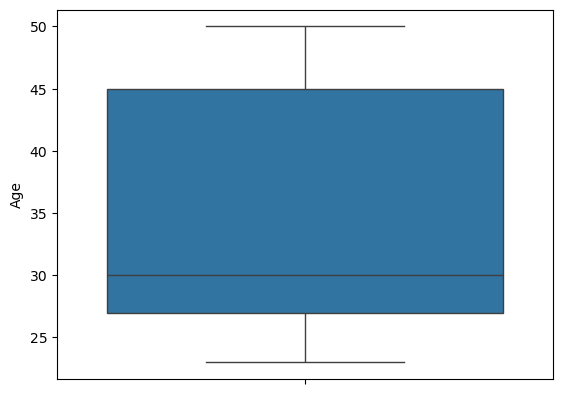

In [20]:
sb.boxplot(df.Age)

<Axes: ylabel='Salary'>

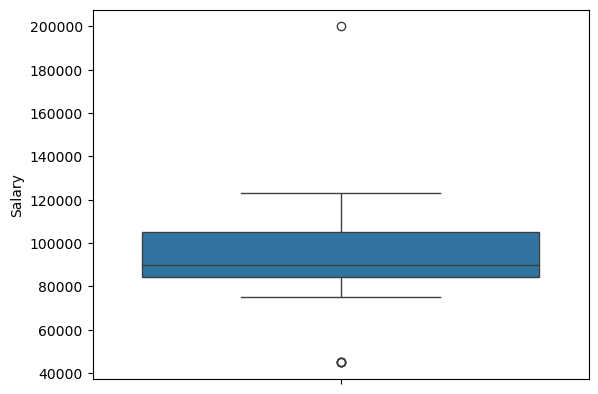

In [21]:
sb.boxplot(df.Salary)

In [10]:
df.Age.min()

23.0

In [11]:
df.Salary.max()

200000.0

In [12]:
df.Salary.min()

45000.0

In [13]:
df.Age.fillna(df.Age.mean(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15672\1807494962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(),inplace=True)


In [23]:
df.Salary.fillna(df.Salary.median(),inplace=True)

<Axes: ylabel='Salary'>

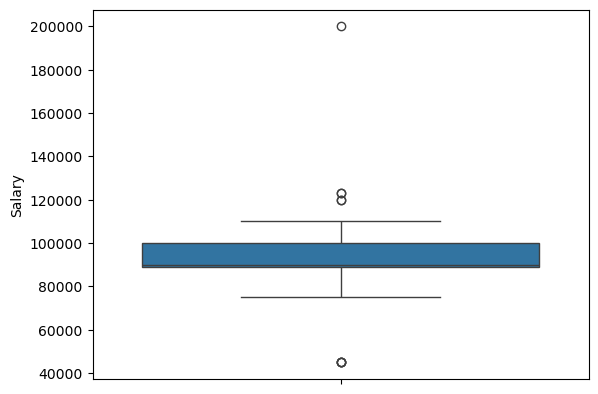

In [24]:
sb.boxplot(df.Salary)

In [25]:
import numpy as np


In [47]:
def outlier_detector(col): 
    q1 = np.percentile(col,25)
    q3 = np.percentile(col,75)
    IQR = q3 - q1
    lower_boundary = q1-1.5*IQR
    higher_boundary = q3+1.5*IQR
    return lower_boundary, higher_boundary

In [48]:
outlier_detector(df.Age)

(np.float64(nan), np.float64(nan))

In [49]:
lb, hb = outlier_detector(df.Salary)

In [50]:
lb , hb

(np.float64(72500.0), np.float64(116500.0))

In [68]:
out = df[(df.Salary <=lb) | (df.Salary >=hb)]['Salary']

<Axes: ylabel='Salary'>

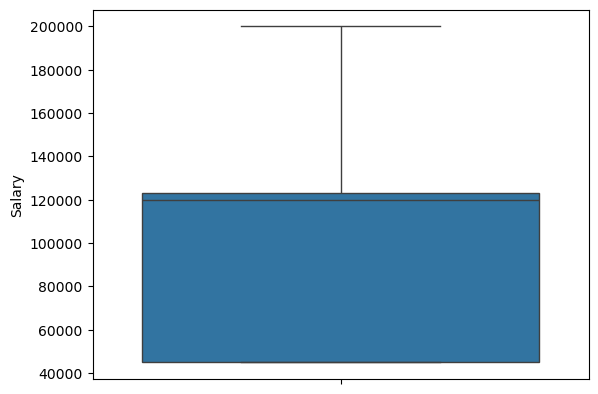

In [69]:
sb.boxplot(out)

In [70]:
df[(df.Salary<lb) | (df.Salary>hb)]

,Serial,Emp_ID,Designation,Department,Age,Salary,Age_category,Sal_category
0,1,1101,Manager,Accounts,50.0,200000.0,Senior,1.5-2
3,4,1005,Manager,HR,45.0,120000.0,Senior,1-1.5
4,5,2123,Office Boy,Accounts,27.0,45000.0,Young,30-50
11,12,3214,Accountant,Account,49.0,123000.0,Senior,1-1.5
17,18,2123,Office Boy,Accounts,27.0,45000.0,Young,30-50
18,19,1005,Manager,HR,45.0,120000.0,Senior,1-1.5
19,20,2123,Office Boy,Accounts,27.0,45000.0,Young,30-50
21,22,3214,Accountant,Account,49.0,123000.0,Senior,1-1.5
25,26,2123,Office Boy,Accounts,27.0,45000.0,Young,30-50


<Axes: ylabel='Salary'>

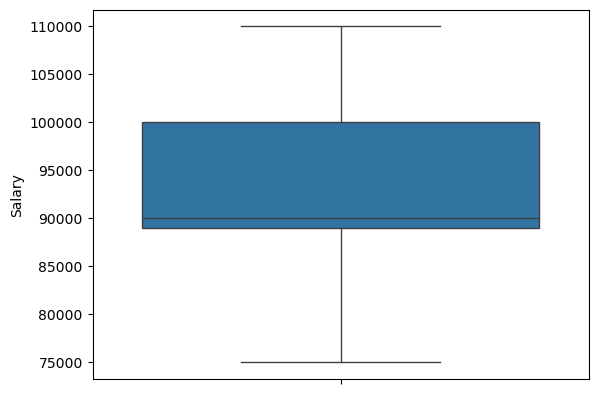

In [71]:
sb.boxplot(df[(df.Salary>=lb) & (df.Salary<=hb)]['Salary'])

<Axes: ylabel='Salary'>

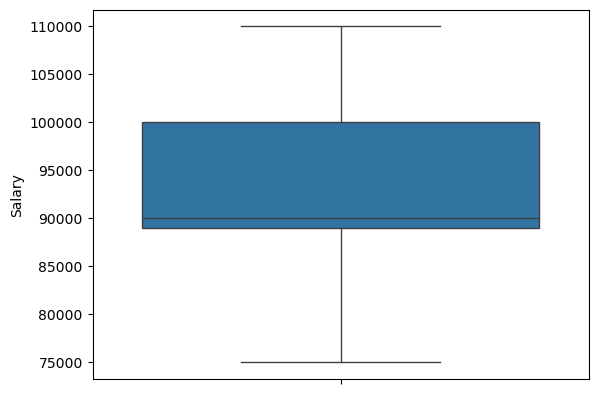

In [72]:
sb.boxplot(df[(df.Salary>=lb)&(df.Salary<=hb)]['Salary'])

In [57]:
dfm = pd.DataFrame(np.arange(5*4).reshape((5,4)),columns=['A','B','C','D'])

In [58]:
dfm

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [59]:
dfm.sample(5)

,A,B,C,D
0,0,1,2,3
2,8,9,10,11
4,16,17,18,19
1,4,5,6,7
3,12,13,14,15


In [60]:
df.sample(7)

,Serial,Emp_ID,Designation,Department,Age,Salary,Age_category,Sal_category
25,26,2123,Office Boy,Accounts,27.0,45000.0,Young,30-50
7,8,1001,Officer,IT,25.0,75000.0,Young,50-1
24,25,2156,Engineer,Production,45.0,89000.0,Senior,50-1
12,13,2156,Engineer,Production,45.0,89000.0,Senior,50-1
2,3,1203,Officer,HR,28.0,90000.0,Young,NaN
22,23,2156,Engineer,Production,45.0,89000.0,Senior,50-1
1,2,1107,Officer,IT,30.0,80000.0,Young,50-1


In [61]:
sampler = np.random.permutation(5)
sampler

array([3, 2, 4, 1, 0], dtype=int32)

In [62]:
df.take(sampler)

,Serial,Emp_ID,Designation,Department,Age,Salary,Age_category,Sal_category
3,4,1005,Manager,HR,45.0,120000.0,Senior,1-1.5
2,3,1203,Officer,HR,28.0,90000.0,Young,NaN
4,5,2123,Office Boy,Accounts,27.0,45000.0,Young,30-50
1,2,1107,Officer,IT,30.0,80000.0,Young,50-1
0,1,1101,Manager,Accounts,50.0,200000.0,Senior,1.5-2


# Computing Indicators

In [63]:
df.Designation.unique()

array(['Manager', 'Officer', 'Office Boy', 'Accountant', 'Engineer'],
      dtype=object)

In [65]:
pd.get_dummies(df.Designation,dtype=int)

,Accountant,Engineer,Manager,Office Boy,Officer
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0
5,1,0,0,0,0
6,1,0,0,0,0
7,0,0,0,0,1
8,0,0,1,0,0
9,0,1,0,0,0


In [66]:
pd.get_dummies(df,dtype=int)

,Serial,Emp_ID,Age,Salary,Designation_Accountant,Designation_Engineer,Designation_Manager,Designation_Office Boy,Designation_Officer,Department_Account,...,Department_HR,Department_IT,Department_Production,Age_category_Young,Age_category_Adult,Age_category_Senior,Sal_category_30-50,Sal_category_50-1,Sal_category_1-1.5,Sal_category_1.5-2
0,1,1101,50.0,200000.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,1107,30.0,80000.0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,3,1203,28.0,90000.0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,4,1005,45.0,120000.0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,5,2123,27.0,45000.0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
5,6,2451,34.0,100000.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,7,1111,NaN,110000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,8,1001,25.0,75000.0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
8,9,1234,23.0,90000.0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
9,10,2156,45.0,89000.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [67]:

df

,Serial,Emp_ID,Designation,Department,Age,Salary,Age_category,Sal_category
0,1,1101,Manager,Accounts,50.0,200000.0,Senior,1.5-2
1,2,1107,Officer,IT,30.0,80000.0,Young,50-1
2,3,1203,Officer,HR,28.0,90000.0,Young,NaN
3,4,1005,Manager,HR,45.0,120000.0,Senior,1-1.5
4,5,2123,Office Boy,Accounts,27.0,45000.0,Young,30-50
5,6,2451,Accountant,NaN,34.0,100000.0,Adult,50-1
6,7,1111,Accountant,Accounts,NaN,110000.0,NaN,1-1.5
7,8,1001,Officer,IT,25.0,75000.0,Young,50-1
8,9,1234,Manager,IT,23.0,90000.0,Young,NaN
9,10,2156,Engineer,Production,45.0,89000.0,Senior,50-1
